In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: March 2025
# License: MIT

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

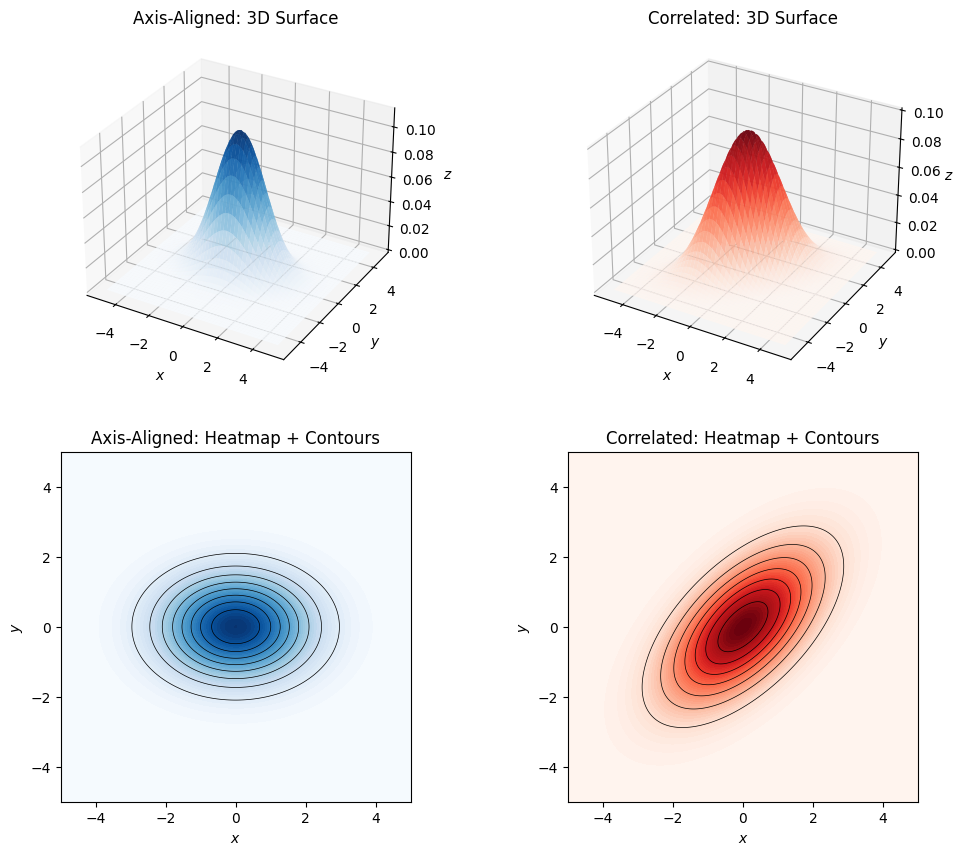

In [3]:
# Create grid
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Mean
mu = [0, 0]

# Covariance matrices
cov_diag = [[2, 0], [0, 1]]
cov_rotated = [[2, 1.2], [1.2, 2]]

# Create multivariate normal distributions
rv_diag = multivariate_normal(mean=mu, cov=cov_diag)
rv_rotated = multivariate_normal(mean=mu, cov=cov_rotated)

# Compute PDF values
Z_diag = rv_diag.pdf(pos)
Z_rotated = rv_rotated.pdf(pos)

# Plotting
fig = plt.figure(figsize=(12, 10))
levels = np.linspace(0, Z_diag.max(), 10)

# Axis-aligned 3D surface
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z_diag, cmap="Blues", edgecolor='none', alpha=0.8)
ax1.set_title("Axis-Aligned: 3D Surface")
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

# Correlated 3D surface
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z_rotated, cmap="Reds", edgecolor='none', alpha=0.8)
ax2.set_title("Correlated: 3D Surface")
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$', labelpad=1.5)

# Axis-aligned 2D heatmap with contours
ax3 = fig.add_subplot(2, 2, 3)
ax3.contourf(X, Y, Z_diag, levels=50, cmap="Blues")
ax3.contour(X, Y, Z_diag, levels=levels, colors='black', linewidths=0.5)
ax3.set_title("Axis-Aligned: Heatmap + Contours")
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_aspect('equal')

# Correlated 2D heatmap with contours
ax4 = fig.add_subplot(2, 2, 4)
ax4.contourf(X, Y, Z_rotated, levels=50, cmap="Reds")
ax4.contour(X, Y, Z_rotated, levels=levels, colors='black', linewidths=0.5)
ax4.set_title("Correlated: Heatmap + Contours")
ax4.set_xlabel('$x$')
ax4.set_ylabel('$y$')
ax4.set_aspect('equal')

plt.savefig('figures/multivariate_normal_distribution.pdf', bbox_inches='tight')